In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Nome do arquivo JSON
arquivo_json = "Dataset_Vetor.json"
print("Carregando o arquivo JSON: #{arquivo_json}\n")

# Carregar os dados do arquivo JSON
with open(arquivo_json, "r") as arquivo:
    dados = json.load(arquivo)

# Converter os dados em um DataFrame
df_dataset_vetor = pd.DataFrame(dados)

# Exibir as primeiras linhas do DataFrame
print(df_dataset_vetor.head())

Carregando o arquivo JSON: #{arquivo_json}

   altitude  accuracy     speed     bearing  timestamp  \
0     432.5       3.8  0.136401  353.619995   0.335475   
1     428.6       2.0  0.111695  294.940002   0.335486   
2     427.5       1.7  0.112209  293.640015   0.335498   
3     429.1       2.0  0.086988  277.720001   0.335509   
4     430.0       1.8  0.050443   90.730003   0.335521   

   diferencalatitudeMetros  diferencalongitudeMetros  constellationType1-svid  \
0                    -4.67                     -1.84                       10   
1                    -3.56                     -1.84                       10   
2                    -2.82                      0.57                       10   
3                    -3.37                      1.50                       10   
4                    -3.19                      1.69                       10   

   constellationType1-svid21-azimuthDegrees  \
0                                     205.0   
1                         

In [3]:
# Certifique-se de que o arquivo JSON foi carregado
if 'dados' not in locals():
	arquivo_json = "Dataset_Vetor.json"
	with open(arquivo_json, "r") as arquivo:
		dados = json.load(arquivo)

# Exibir a estrutura do primeiro objeto da lista contida no JSON
primeiro_objeto = dados[0]
print("Estrutura do primeiro objeto da lista:\n")
print(json.dumps(primeiro_objeto, indent=4, ensure_ascii=False))

Estrutura do primeiro objeto da lista:

{
    "altitude": 432.5,
    "accuracy": 3.799999952316284,
    "speed": 0.13640138506889343,
    "bearing": 353.6199951171875,
    "timestamp": 0.33547453703703706,
    "diferencalatitudeMetros": -4.67,
    "diferencalongitudeMetros": -1.84,
    "constellationType1-svid": 10,
    "constellationType1-svid21-azimuthDegrees": 205,
    "constellationType1-svid21-elevationDegrees": 56,
    "constellationType1-svid21-cn0DbHz": 42.79999923706055,
    "constellationType1-svid21-basebandCn0DbHz": 39.29999923706055,
    "constellationType1-svid21-carrierFrequencyHz": 1575420032,
    "constellationType1-svid8-azimuthDegrees": 310,
    "constellationType1-svid8-elevationDegrees": 49,
    "constellationType1-svid8-cn0DbHz": 33.900001525878906,
    "constellationType1-svid8-basebandCn0DbHz": 30.399999618530273,
    "constellationType1-svid8-carrierFrequencyHz": 1575420032,
    "constellationType1-svid2-azimuthDegrees": 212,
    "constellationType1-svid2-eleva

Estatísticas - Diferença de Latitude:
{'manhã': count    214272.000000
mean          0.559632
std           4.099597
min         -87.880000
25%          -0.840000
50%           0.830000
75%           1.570000
max          74.740000
Name: diferencalatitudeMetros, dtype: float64, 'tarde': count    205606.000000
mean          4.609148
std           5.829759
min         -85.460000
25%           2.920000
50%           4.700000
75%           6.090000
max          78.200000
Name: diferencalatitudeMetros, dtype: float64}

Estatísticas - Diferença de Longitude:
{'manhã': count    214272.000000
mean          0.591057
std           5.191813
min        -124.370000
25%          -0.660000
50%           0.390000
75%           1.690000
max         134.160000
Name: diferencalongitudeMetros, dtype: float64, 'tarde': count    205606.000000
mean         -0.407420
std           7.972506
min        -111.420000
25%          -1.840000
50%          -0.620000
75%           0.760000
max         130.450000
Name: 

C:\Users\bruno\AppData\Local\Temp\ipykernel_37036\3249938896.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(manha['diferencalatitudeMetros'], label='Manhã', shade=True)
C:\Users\bruno\AppData\Local\Temp\ipykernel_37036\3249938896.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tarde['diferencalatitudeMetros'], label='Tarde', shade=True)
C:\Users\bruno\AppData\Local\Temp\ipykernel_37036\3249938896.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(manha['diferencalongitudeMetros'], label='Manhã', shade=True)
C:\Users\bruno\AppData\Local\Temp\ipykernel_37036\3249938896.py:37: FutureWarning: 

`shade` is now de

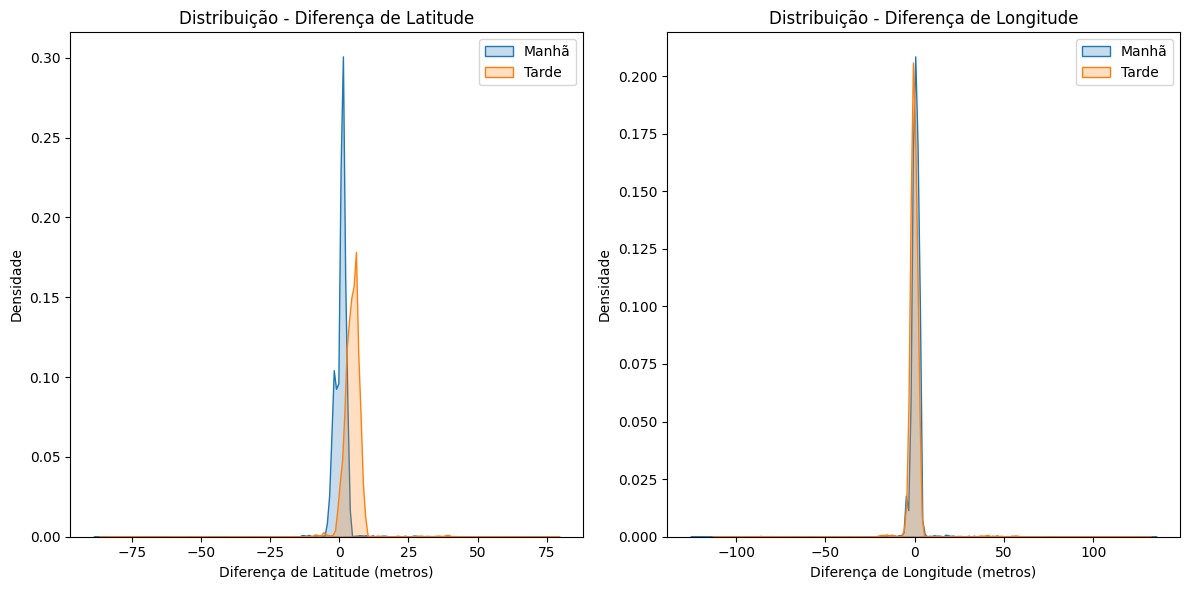

In [5]:
# Filtrar os dados por período
manha = df_dataset_vetor[df_dataset_vetor['timestamp'] <= 0.5]
tarde = df_dataset_vetor[df_dataset_vetor['timestamp'] > 0.5]

# Calcular estatísticas descritivas para as diferenças de latitude e longitude
estatisticas_latitude = {
    'manhã': manha['diferencalatitudeMetros'].describe(),
    'tarde': tarde['diferencalatitudeMetros'].describe()
}

estatisticas_longitude = {
    'manhã': manha['diferencalongitudeMetros'].describe(),
    'tarde': tarde['diferencalongitudeMetros'].describe()
}

print("Estatísticas - Diferença de Latitude:")
print(estatisticas_latitude)

print("\nEstatísticas - Diferença de Longitude:")
print(estatisticas_longitude)

# Visualizar as tendências com gráficos
plt.figure(figsize=(12, 6))

# Gráfico para diferença de latitude
plt.subplot(1, 2, 1)
sns.kdeplot(manha['diferencalatitudeMetros'], label='Manhã', shade=True)
sns.kdeplot(tarde['diferencalatitudeMetros'], label='Tarde', shade=True)
plt.title('Distribuição - Diferença de Latitude')
plt.xlabel('Diferença de Latitude (metros)')
plt.ylabel('Densidade')
plt.legend()

# Gráfico para diferença de longitude
plt.subplot(1, 2, 2)
sns.kdeplot(manha['diferencalongitudeMetros'], label='Manhã', shade=True)
sns.kdeplot(tarde['diferencalongitudeMetros'], label='Tarde', shade=True)
plt.title('Distribuição - Diferença de Longitude')
plt.xlabel('Diferença de Longitude (metros)')
plt.ylabel('Densidade')
plt.legend()

plt.tight_layout()
plt.show()